In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Step 1: Load the dataset
df = pd.read_csv('/content/medical_dataset.csv')

# Step 2: Preprocess the data

# Convert categorical columns to numerical using Label Encoding
label_encoder = LabelEncoder()

df['Symptoms'] = label_encoder.fit_transform(df['Symptoms'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Disease'] = label_encoder.fit_transform(df['Disease'])
df['Severity'] = label_encoder.fit_transform(df['Severity'])

# Step 3: Separate features (X) and target (y)
X = df.drop(columns=['Disease'])  # Features
y = df['Disease']                 # Target (Disease to predict)

# Step 4: Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Define the Random Forest model with hyperparameter tuning

# Define hyperparameters for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the forest
    'max_depth': [10, 20, 30, 40, None],        # Max depth of trees
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],              # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                  # Bootstrap samples when building trees
}

# Instantiate the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Step 6: Perform RandomizedSearchCV for hyperparameter tuning
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
rf_random.fit(X_train, y_train)

# Step 7: Make predictions with the best model
best_rf_model = rf_random.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Accuracy: 54.55%
Confusion Matrix:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]]
Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         1
          14 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

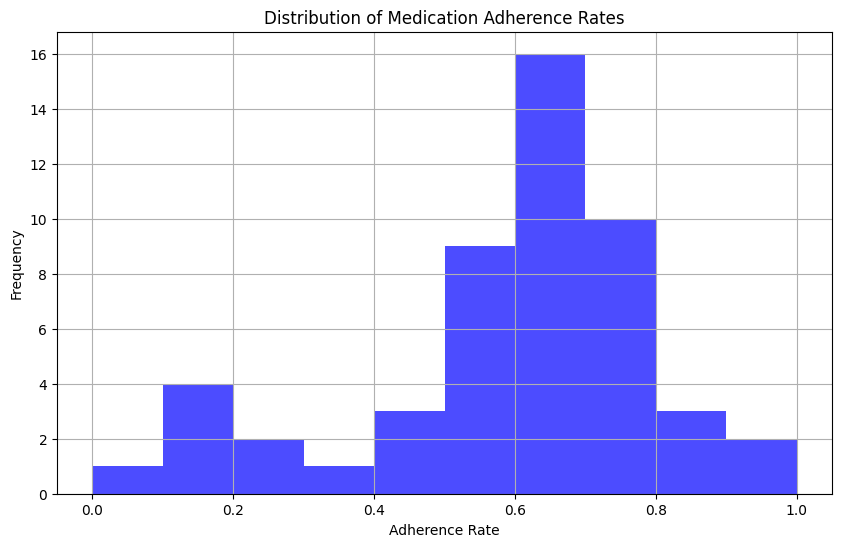

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data_path = '/content/medication_adherence_dataset.csv'
medication_adherence_df = pd.read_csv(data_path)

# Calculate adherence rate
medication_adherence_df['Adherence Rate'] = medication_adherence_df['No. of Times Med Taken On Time'] / (medication_adherence_df['No. of Times Med Taken On Time'] + medication_adherence_df['No. of Times Medicine Missed'] + medication_adherence_df['Delayed Medicine Intake'])

# Visualize the adherence rate
plt.figure(figsize=(10, 6))
plt.hist(medication_adherence_df['Adherence Rate'], bins=10, color='blue', alpha=0.7)
plt.title('Distribution of Medication Adherence Rates')
plt.xlabel('Adherence Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

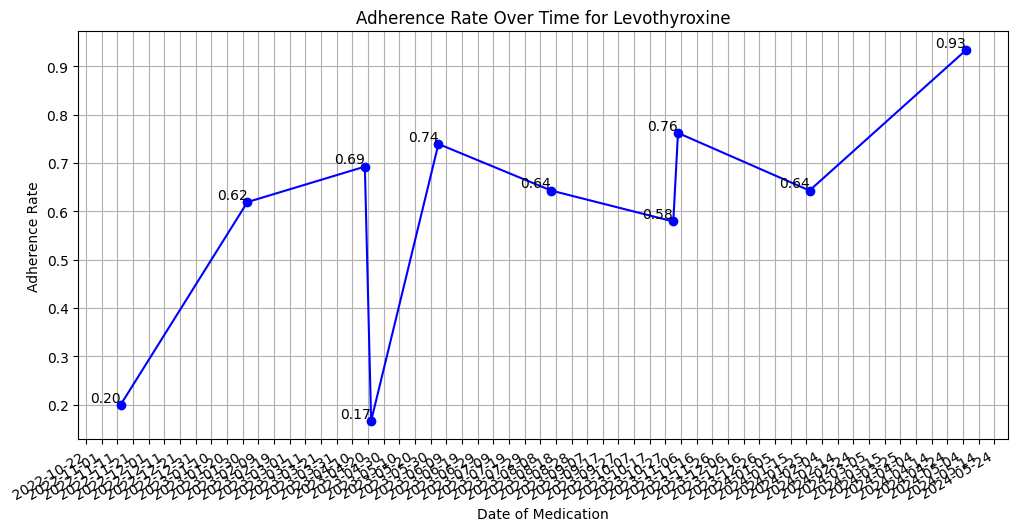

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset
data_path = '/content/medication_adherence_dataset.csv'
medication_adherence_df = pd.read_csv(data_path)

# Calculate adherence rate
medication_adherence_df['Adherence Rate'] = medication_adherence_df['No. of Times Med Taken On Time'] / (medication_adherence_df['No. of Times Med Taken On Time'] + medication_adherence_df['No. of Times Medicine Missed'] + medication_adherence_df['Delayed Medicine Intake'])

# Convert 'Date of Medication' to datetime format for plotting
medication_adherence_df['Date of Medication'] = pd.to_datetime(medication_adherence_df['Date of Medication'])

# Filter data for a specific medicine, e.g., 'Levothyroxine'
specific_med = medication_adherence_df[medication_adherence_df['Medicine'] == 'Levothyroxine']

# Sort by date to ensure the line plot is ordered
specific_med = specific_med.sort_values('Date of Medication')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(specific_med['Date of Medication'], specific_med['Adherence Rate'], marker='o', linestyle='-', color='blue')

# Formatting the plot
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate()  # Rotation

# Adding data labels
for x, y in zip(specific_med['Date of Medication'], specific_med['Adherence Rate']):
    plt.text(x, y, f'{y:.2f}', color='black', ha='right', va='bottom')

plt.title('Adherence Rate Over Time for Levothyroxine')
plt.xlabel('Date of Medication')
plt.ylabel('Adherence Rate')
plt.grid(True)
plt.show()

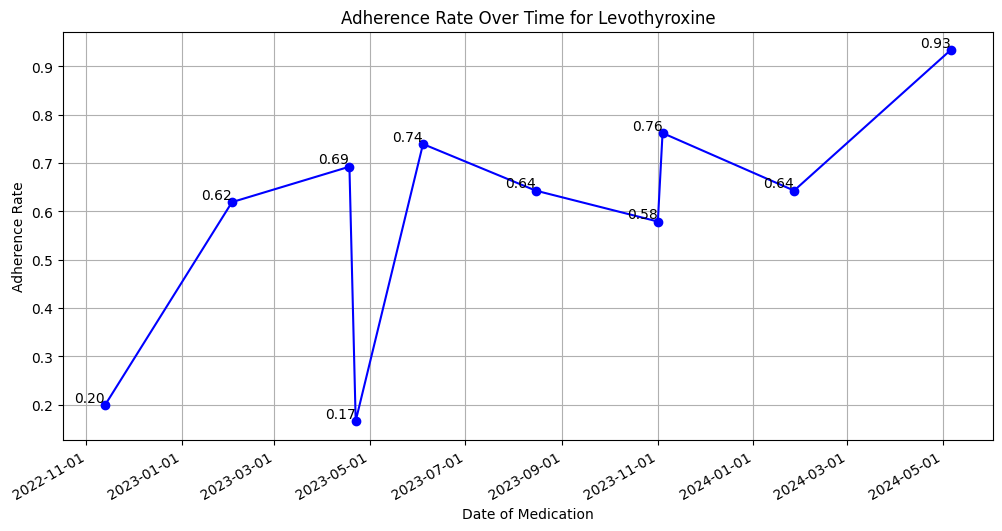

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset
data_path = '/content/medication_adherence_dataset.csv'
medication_adherence_df = pd.read_csv(data_path)

# Calculate adherence rate
medication_adherence_df['Adherence Rate'] = medication_adherence_df['No. of Times Med Taken On Time'] / (medication_adherence_df['No. of Times Med Taken On Time'] + medication_adherence_df['No. of Times Medicine Missed'] + medication_adherence_df['Delayed Medicine Intake'])

# Convert 'Date of Medication' to datetime format for plotting
medication_adherence_df['Date of Medication'] = pd.to_datetime(medication_adherence_df['Date of Medication'])

# Filter data for a specific medicine, e.g., 'Levothyroxine'
specific_med = medication_adherence_df[medication_adherence_df['Medicine'] == 'Levothyroxine']

# Sort by date to ensure the line plot is ordered
specific_med = specific_med.sort_values('Date of Medication')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(specific_med['Date of Medication'], specific_med['Adherence Rate'], marker='o', linestyle='-', color='blue')

# Formatting the plot
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=5, maxticks=15))  # Auto adjust ticks
plt.gcf().autofmt_xdate()  # Rotation

# Adding data labels
for x, y in zip(specific_med['Date of Medication'], specific_med['Adherence Rate']):
    plt.text(x, y, f'{y:.2f}', color='black', ha='right', va='bottom')

plt.title('Adherence Rate Over Time for Levothyroxine')
plt.xlabel('Date of Medication')
plt.ylabel('Adherence Rate')
plt.grid(True)
plt.show()